In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
cdf=df.copy()

In [5]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
157897,110593.0,-0.184771,1.108228,-0.000420,-0.407888,1.116536,-1.256184,1.621746,-0.591068,0.600826,...,0.085034,0.670869,-0.393378,0.024006,0.307905,0.272145,0.056828,0.127693,23.40,0
278441,168224.0,1.551207,-0.899886,-3.103947,0.029130,0.882554,-0.751118,1.243737,-0.472464,-0.110084,...,0.482927,0.839430,-0.496715,0.325256,0.665988,0.408737,-0.168670,-0.046225,310.00,0
178316,123580.0,-0.226187,1.396738,-0.766720,0.839888,1.009486,-0.218086,1.626510,-0.468615,-0.391006,...,0.185604,0.928662,-0.094267,0.640909,-0.742096,-0.638334,-0.528740,-0.261750,59.60,0
173828,121657.0,2.061814,-0.002162,-1.047232,0.412224,-0.088962,-1.203159,0.230400,-0.373535,0.439906,...,-0.280900,-0.642920,0.333149,0.064582,-0.277073,0.193128,-0.066396,-0.058382,1.98,0
181882,125160.0,2.411499,-0.945026,-2.179706,-1.663150,-0.141163,-1.013506,-0.193541,-0.561755,-1.988911,...,-0.057992,0.438085,-0.019820,0.537304,0.490309,0.089883,-0.042105,-0.071084,10.00,0
249600,154489.0,2.189191,-0.673278,-1.421533,-1.095467,-0.245381,-0.695507,-0.399127,-0.246410,-0.944722,...,0.492110,1.409953,0.002608,0.849445,0.218507,0.009599,-0.042008,-0.066213,15.00,0
186741,127236.0,-0.037430,1.258773,0.874234,2.963097,1.008588,0.033458,0.972456,-0.058097,-1.438243,...,0.157799,0.583486,-0.193589,-0.098863,-0.070838,0.026904,0.049372,0.046189,7.57,0
130582,79385.0,1.073372,0.155477,-0.175165,0.711253,1.042201,1.588291,-0.016883,0.340067,-0.177211,...,0.120799,0.562449,-0.111037,-1.754190,0.520497,-0.154572,0.088233,0.003886,27.30,0
178615,123706.0,1.654301,-0.217762,-2.065709,1.432106,0.516326,-0.495317,0.482452,-0.075117,0.126113,...,-0.047101,-0.475926,0.052558,0.533127,0.019823,-0.796977,-0.032667,-0.001254,169.42,0
131258,79536.0,-1.333894,1.325309,1.691594,-0.018299,-0.444247,-0.446008,0.471467,0.416722,-0.756810,...,-0.182823,-0.615566,0.025398,0.398609,0.031015,0.080103,0.032653,0.058260,45.32,0


Info Provided by European cardholders Dataset Genrator:

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no missing value so we can proced futher for more analysis.

In [9]:
# Percentage of non-fraudulent data in our dataset 
print(f"Non-Fraudulent Transcations: {round((df[df['Class']==0].shape[0]/df.shape[0])*100,3)}%")
# Percentage of fraudulent data in our dataset 
print(f"Fraudulent Transcations: {round((df[df['Class']==1].shape[0]/df.shape[0])*100,3)}%")



Non-Fraudulent Transcations: 99.827%
Fraudulent Transcations: 0.173%


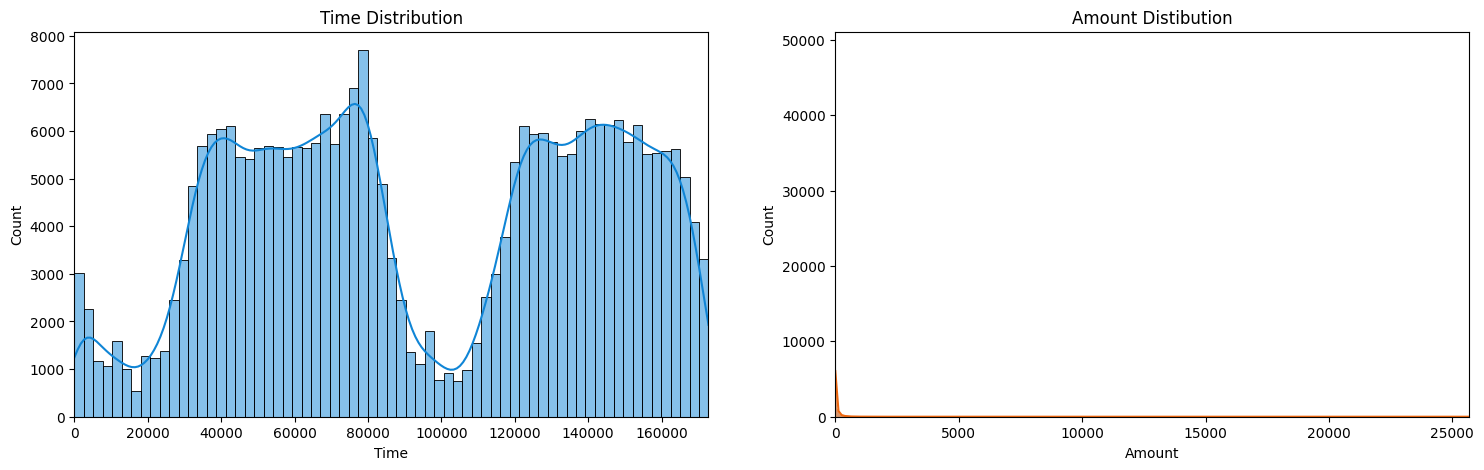

In [10]:
fig,ax=plt.subplots(1,2,figsize=(18,5))
sns.histplot(df['Time'],kde=True,color='#0f85d6',ax=ax[0])
ax[0].set_title('Time Distribution')
ax[0].set_xlim(df['Time'].min(),df['Time'].max())

sns.histplot(df['Amount'],kde=True,ax=ax[1],color='#ef6810')
ax[1].set_title("Amount Distibution")
ax[1].set_xlim(df['Amount'].min(),df['Amount'].max())


plt.show()

Time Distribution is normal in a time period but the distibution of Amount is too right skew due to large difference between min,max value of feature Amount.confirm is it using boxplot 


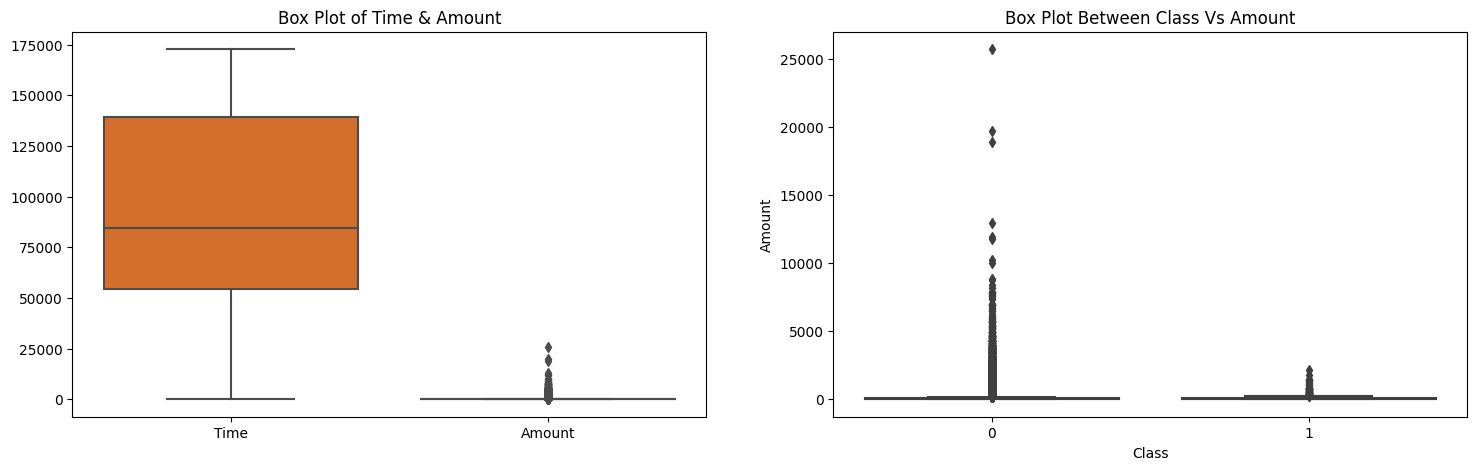

In [11]:
fig,ax=plt.subplots(1,2,figsize=(18,5))
sns.boxplot(df[['Time','Amount']],ax=ax[0],palette=['#ef6810','#ef103f'])
ax[0].set_title('Box Plot of Time & Amount')
sns.boxplot(x='Class',y='Amount',data=df,ax=ax[1])
ax[1].set_title('Box Plot Between Class Vs Amount')

plt.show()


The above box plot suggest that feature Time has no outliers and feature Amount has lot's of Outliers and second box plot suggest that Class 0 has more outliers then class 1 and range from 

We have given that from V1 to V28 features are scaled so we also scaled the Time and Amount feature for futher analysis using RobustScaler  if you are curious about why we select RobustScaler instead of Standerscaler  because it use IQR ,method which is robust to extreme (outliers) values 

'X(normal) = X−median(X)/IQR(x)

In [12]:

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df['Time_Scaled']=scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount_Scaled']=scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# Drop Time and Amount Feature from dataset as we add Time_Scaled and Amount_Scaled in DataFrame 
df.drop(columns=['Time','Amount'],inplace=True,axis=1)

In [13]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Scaled,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


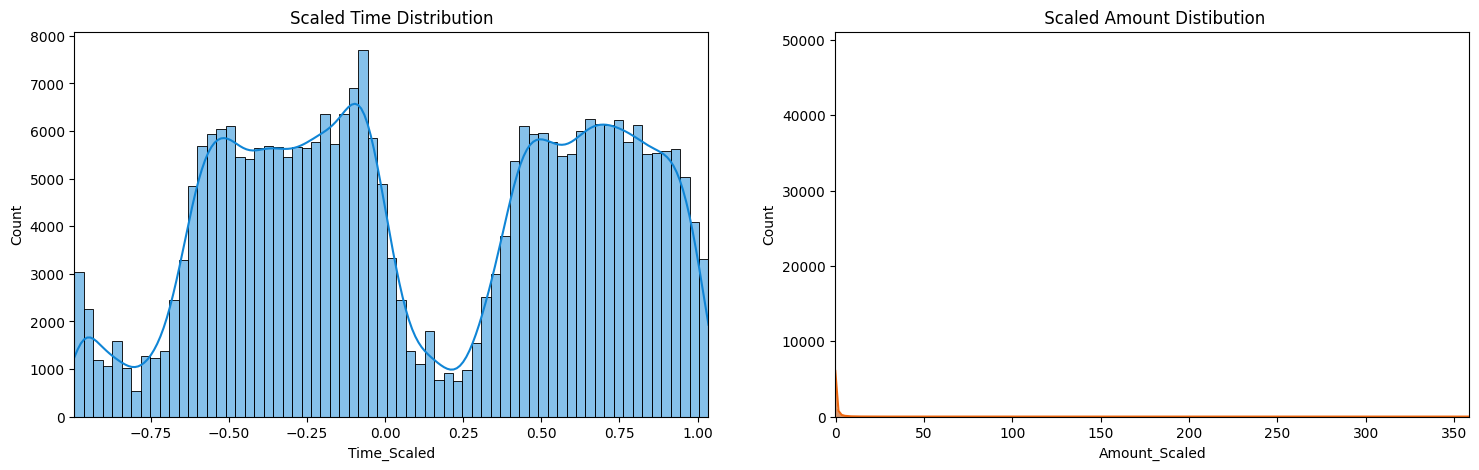

In [14]:
fig,ax=plt.subplots(1,2,figsize=(18,5))
sns.histplot(df['Time_Scaled'],kde=True,color='#0f85d6',ax=ax[0])
ax[0].set_title('Scaled Time Distribution')
ax[0].set_xlim(df['Time_Scaled'].min(),df['Time_Scaled'].max())

sns.histplot(df['Amount_Scaled'],kde=True,ax=ax[1],color='#ef6810')
ax[1].set_title(" Scaled Amount Distibution")
ax[1].set_xlim(df['Amount_Scaled'].min(),df['Amount_Scaled'].max())


plt.show()

Distribution remain same cause RobustScaler doesn't affect the normal distributed data. Time feature is normal distributed so Time_Scaled remain normal distributed.
RobustScaler also not change the skewness from data but reduce the impact of outliers which we can see in our Amount_Scaled distribution

In [15]:
from sklearn.model_selection import StratifiedKFold 

As we know out dataset contain 99.827% of Non-Fraudulent Data and 0.173% of Fraudulent Data and for futher analysis we want to split into train,test but normal train_test_split method doesn't work here so we import StratifiedKFold to split Imbalance data 


In [16]:

X=df.drop(columns=['Class'])
y=df['Class']
skf=StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    print("Train Index:", train_index, "Test Index:", test_index)
x_train,x_test=X.iloc[train_index],X.iloc[test_index]
y_train,y_test=y.iloc[train_index],y.iloc[test_index]
#y_train,y_test

Train Index: [ 30473  30496  31002 ... 284804 284805 284806] Test Index: [    0     1     2 ... 57017 57018 57019]
Train Index: [     0      1      2 ... 284804 284805 284806] Test Index: [ 30473  30496  31002 ... 113964 113965 113966]
Train Index: [     0      1      2 ... 284804 284805 284806] Test Index: [ 81609  82400  83053 ... 170946 170947 170948]
Train Index: [     0      1      2 ... 284804 284805 284806] Test Index: [150654 150660 150661 ... 227866 227867 227868]
Train Index: [     0      1      2 ... 227866 227867 227868] Test Index: [212516 212644 213092 ... 284804 284805 284806]


In [17]:
# let's confirm how much percentage each category fall in train and test data 
#For y_train
print(f"Non-Fraudulent Transcations in y_train: {round(((y_train.values==0).sum()/y_train.shape[0])*100,3)}%")
#Percentage of fraudulent data in y_train
print(f"Fraudulent Transcations in y_train: {round(((y_train.values==1).sum()/y_train.shape[0])*100,3)}%")
print()
#For y_test
print(f"Non-Fraudulent Transcations in y_test: {round(((y_test.values==0).sum()/y_test.shape[0])*100,3)}%")
#Percentage of fraudulent data in y_test
print(f"Fraudulent Transcations in y_train: {round(((y_test.values==1).sum()/y_test.shape[0])*100,3)}%")


Non-Fraudulent Transcations in y_train: 99.827%
Fraudulent Transcations in y_train: 0.173%

Non-Fraudulent Transcations in y_test: 99.828%
Fraudulent Transcations in y_train: 0.172%


Data split is done and we can confirm that there is almost equal percentage of Fraudulent data  in y_train and y_test so we don't have to worry about Model learning problem due to absent of minor data percentage thanks to StratifiedKFold()

In [18]:
df.shape

(284807, 31)

Random Undersampling

In [19]:
# Let's Do Random Undersampling to train the ML models cause our dataset is imbalanced
#before preceding to Randomsample make sure your data is suffled so you get suffled Non-Fraudulent for better result
df=df.sample(284807)
Fraud_Data=df[df['Class']==1]
Non_Fraud_Data=df[df['Class']==0][:492]
new_df=pd.concat([Fraud_Data,Non_Fraud_Data])
new_df=new_df.sample(n=new_df.shape[0],random_state=42)

In [20]:
new_df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Scaled,Amount_Scaled
241445,-3.818214,2.551338,-4.759158,1.636967,-1.167900,-1.678413,-3.144732,1.245106,-1.692541,-4.759931,...,0.761712,-0.417694,-0.469712,-0.225934,0.586415,-0.348107,0.087777,1,0.779344,-0.157898
235616,0.218810,2.715855,-5.111658,6.310661,-0.848345,-0.882446,-2.902079,0.939162,-3.627698,-1.873331,...,1.037324,0.062325,0.532490,-0.149145,0.639580,0.351568,-0.001817,1,0.749257,-0.296793
197185,1.239276,-2.212808,-2.393390,-0.099816,1.242783,4.061149,-0.709314,0.854884,-0.473702,0.824698,...,-0.619283,-0.074234,0.651608,-0.287183,-0.696606,0.006652,0.038092,0,0.554436,5.784951
189701,-4.599447,2.762540,-4.656530,5.201403,-2.470388,-0.357618,-3.767189,0.061466,-1.836200,-1.470645,...,0.261333,0.621415,0.994110,-0.687853,-0.337531,-1.612791,1.231425,1,0.514891,0.996996
223915,1.795730,-1.502166,-2.715497,-1.538789,1.459905,3.469648,-1.305134,0.897601,-0.115284,0.019465,...,0.572347,-0.006897,0.612803,-0.174634,-0.085343,0.016231,0.011851,0,0.691761,2.333543


In [21]:
#  Checking Correlation of different feature of new_df how they affect each other 
corr=new_df.corr()
corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Scaled,Amount_Scaled
V1,1.000000,-0.805935,0.880538,-0.608230,0.859491,0.332333,0.887652,-0.083680,0.653440,0.733944,...,-0.033194,-0.033872,-0.082214,-0.086378,0.041588,0.182976,0.210921,-0.429169,0.233966,-0.025660
V2,-0.805935,1.000000,-0.861414,0.675716,-0.808640,-0.283880,-0.835954,-0.026762,-0.693041,-0.762334,...,0.000708,0.172902,0.000592,0.151777,0.015745,-0.173336,0.070419,0.480641,-0.205670,-0.188290
V3,0.880538,-0.861414,1.000000,-0.768327,0.852098,0.472096,0.891257,-0.169888,0.768250,0.855893,...,-0.065118,-0.032930,-0.026072,-0.115695,-0.020443,0.106629,0.131632,-0.572221,0.141509,-0.015966
V4,-0.608230,0.675716,-0.768327,1.000000,-0.579329,-0.437202,-0.712186,0.099635,-0.793418,-0.799664,...,0.139337,0.021456,-0.018264,-0.007283,0.154458,-0.025870,-0.092189,0.712172,-0.182244,0.012432
V5,0.859491,-0.808640,0.852098,-0.579329,1.000000,0.309079,0.840496,-0.203067,0.663338,0.755953,...,-0.094804,-0.093423,-0.142346,-0.114951,0.044032,0.196096,0.145784,-0.379339,0.267611,-0.117656
V6,0.332333,-0.283880,0.472096,-0.437202,0.309079,1.000000,0.287024,-0.559226,0.380462,0.430772,...,-0.000066,0.317014,-0.075999,-0.109415,-0.071080,-0.167733,-0.018021,-0.415159,0.093709,0.143857
V7,0.887652,-0.835954,0.891257,-0.712186,0.840496,0.287024,1.000000,0.089940,0.767442,0.865092,...,-0.121329,-0.087151,-0.067926,0.034442,0.014072,0.237781,0.165772,-0.475549,0.206273,0.104009
V8,-0.083680,-0.026762,-0.169888,0.099635,-0.203067,-0.559226,0.089940,1.000000,-0.070890,-0.048285,...,0.041478,-0.429228,0.078185,0.236750,0.050419,0.288612,-0.017866,0.051612,-0.139637,0.030666
V9,0.653440,-0.693041,0.768250,-0.793418,0.663338,0.380462,0.767442,-0.070890,1.000000,0.857070,...,-0.251200,-0.051086,-0.013090,-0.021308,-0.133493,0.147273,0.139660,-0.562707,0.148406,0.012622
V10,0.733944,-0.762334,0.855893,-0.799664,0.755953,0.430772,0.865092,-0.048285,0.857070,1.000000,...,-0.220788,-0.056170,-0.042476,0.007749,-0.043234,0.168796,0.141032,-0.629284,0.200110,-0.015371


Difficult to understand by just look into huge matrix so we draw a heatmap for better understanding using visualization

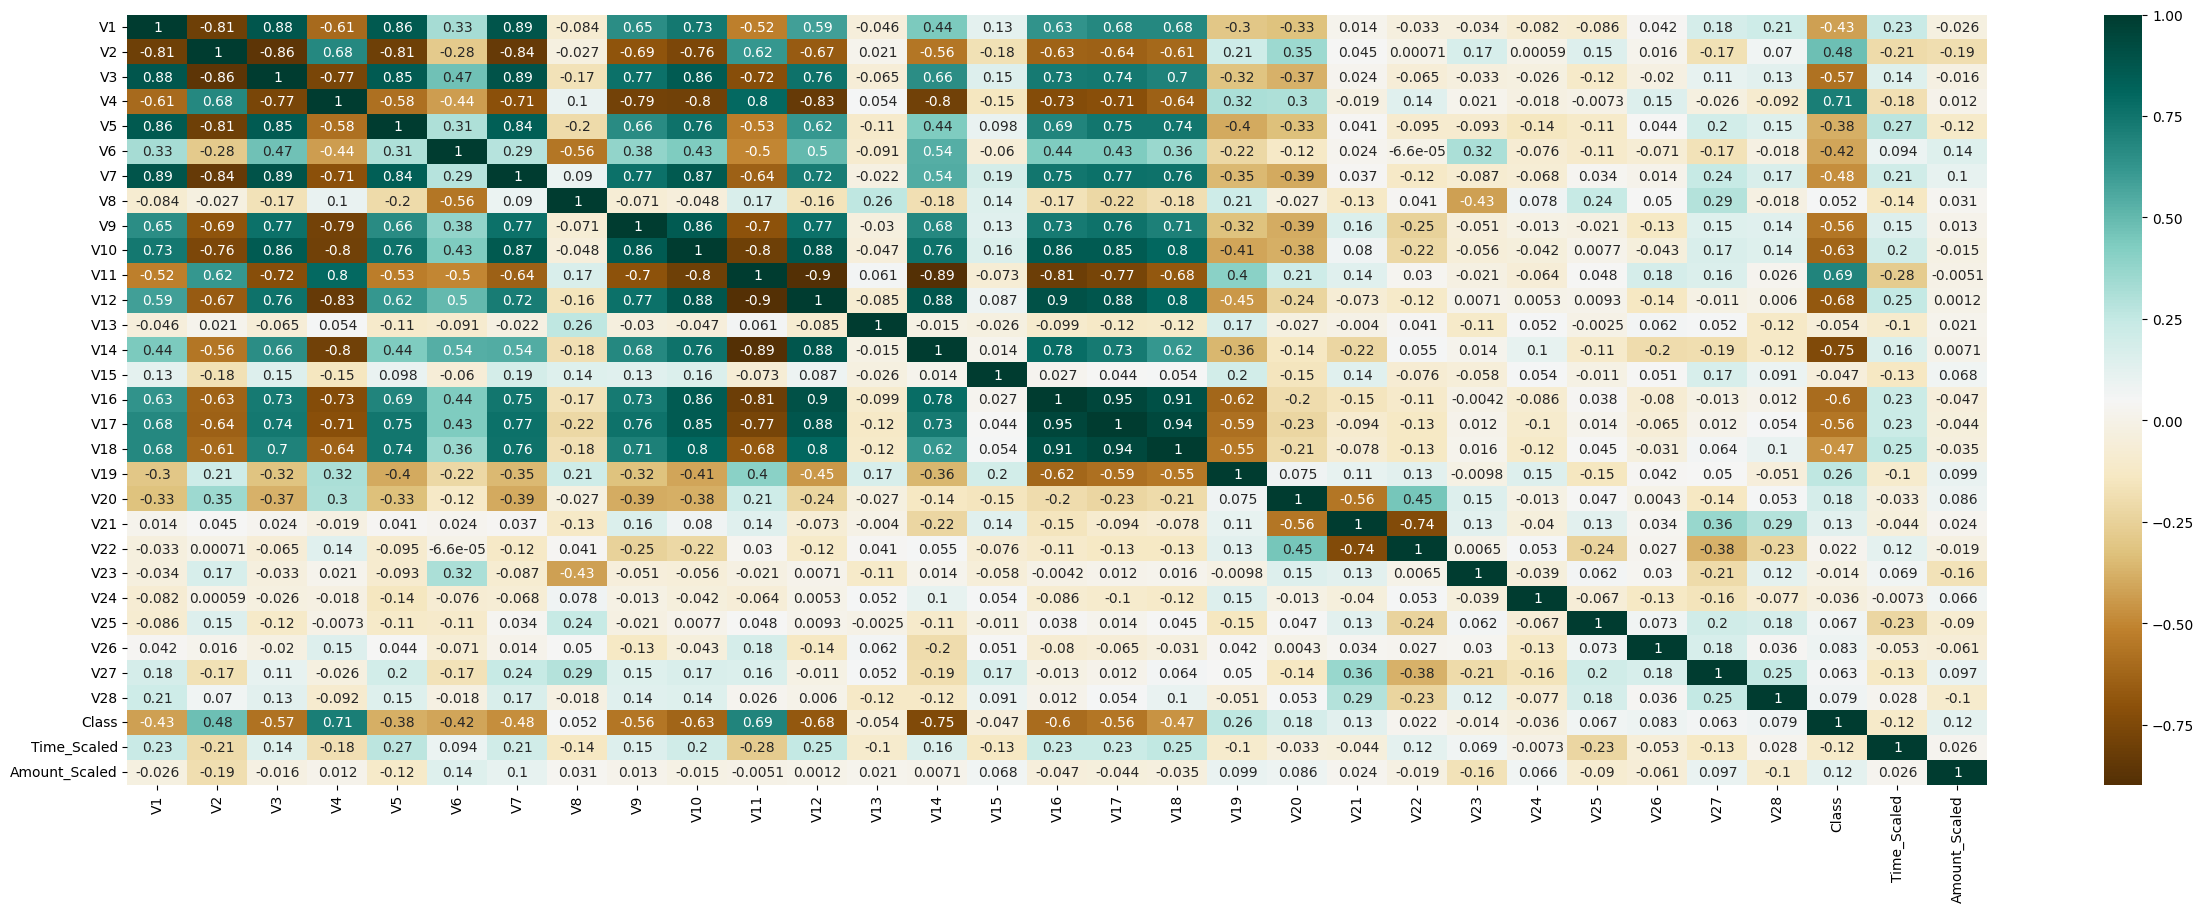

In [22]:
plt.figure(figsize=(30,10))
sns.heatmap(corr,annot=True,cmap='BrBG')
plt.show()

From above heatmap we can conclude that V10,V12,V14,V16 features are highly correlated with class in negative terms and in positive terms features V2,V4,V11,V19 are strongly correlated with class than any other feature tell check how actually they affect Fraud and Non-Fraud Classification.

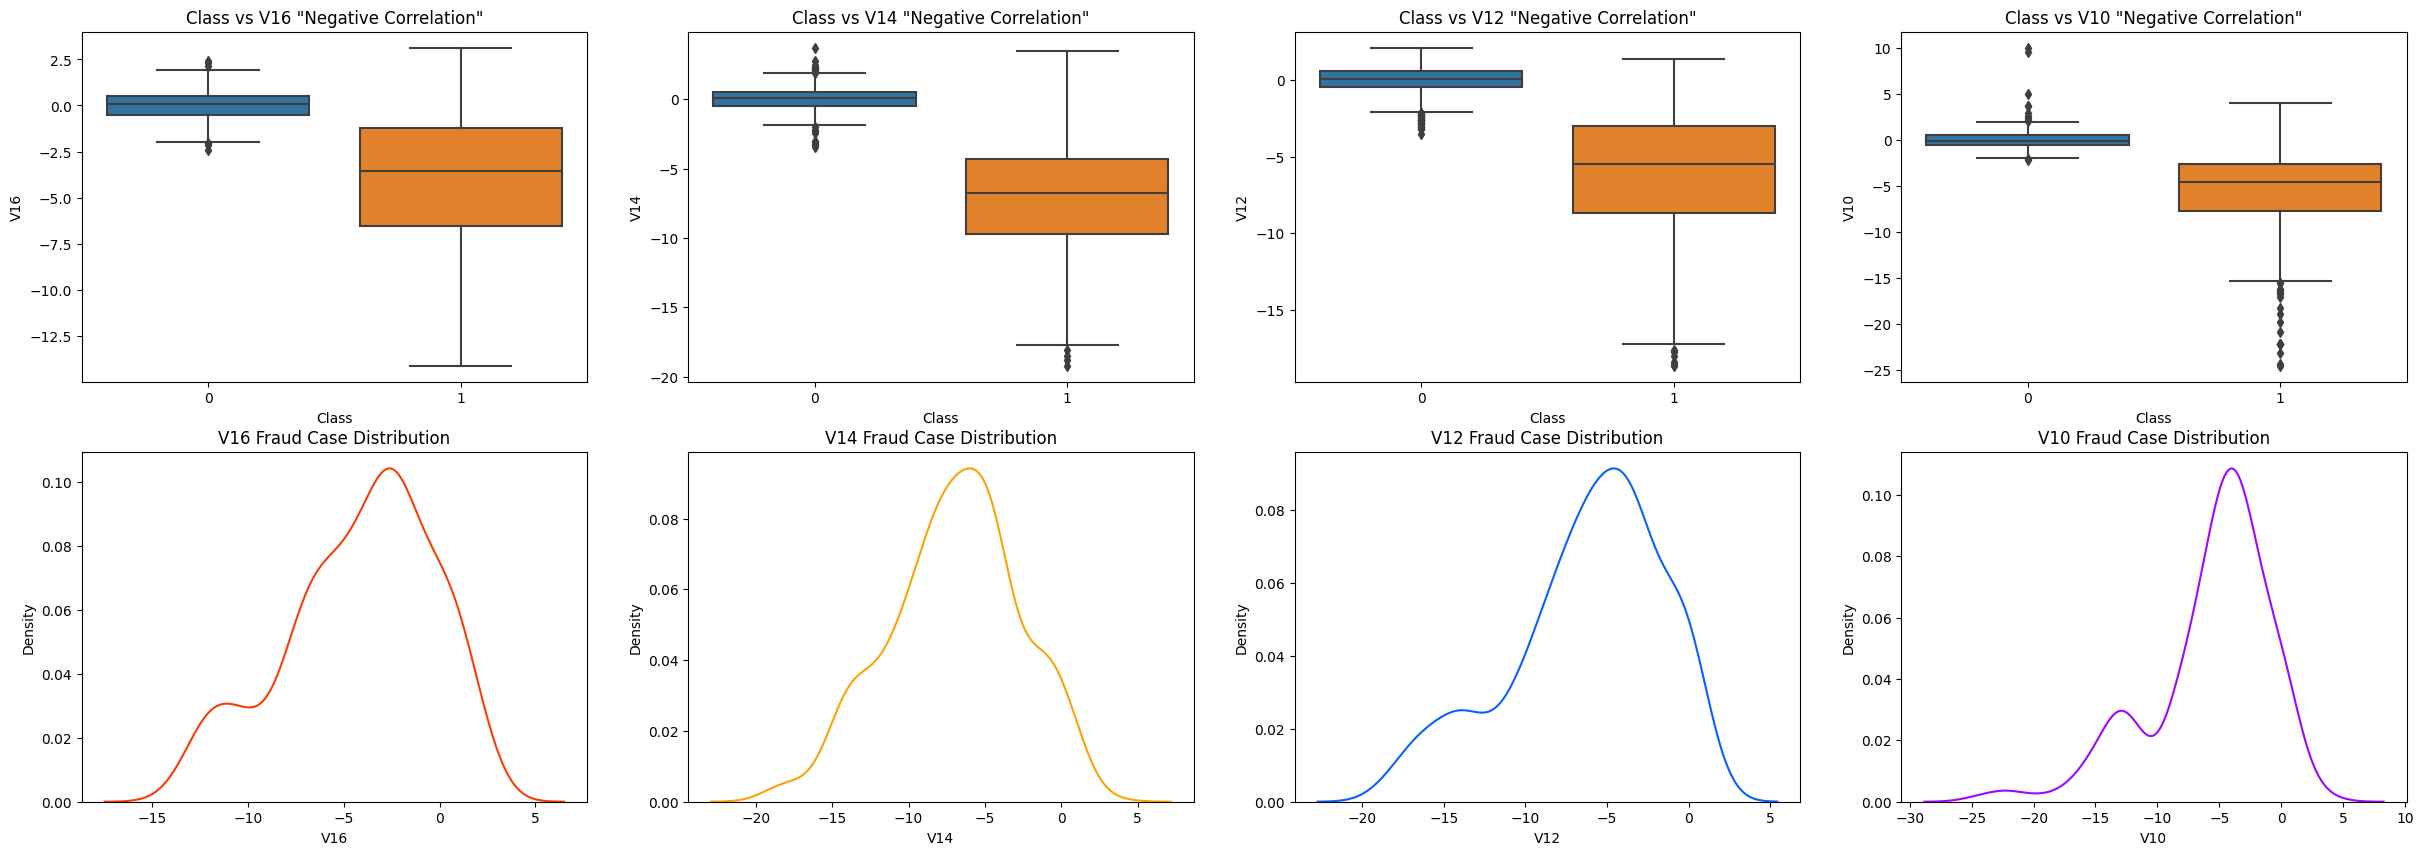

In [23]:
fig,ax=plt.subplots(2,4,figsize=(30,10))
ax=ax.ravel()
sns.boxplot(x='Class',y='V16',data=new_df,ax=ax[0])
ax[0].set_title('Class vs V16 "Negative Correlation"')

sns.boxplot(x='Class',y='V14',data=new_df,ax=ax[1])
ax[1].set_title('Class vs V14 "Negative Correlation"')

sns.boxplot(x='Class',y='V12',data=new_df,ax=ax[2])
ax[2].set_title('Class vs V12 "Negative Correlation"')

sns.boxplot(x='Class',y='V10',data=new_df,ax=ax[3])
ax[3].set_title('Class vs V10 "Negative Correlation"')

sns.kdeplot(new_df['V16'].loc[new_df['Class']==1],color='#f83e07',ax=ax[4])
ax[4].set_title('V16 Fraud Case Distribution')

sns.kdeplot(new_df['V14'].loc[new_df['Class']==1],color='#f8a407',ax=ax[5])
ax[5].set_title('V14 Fraud Case Distribution')

sns.kdeplot(new_df['V12'].loc[new_df['Class']==1],color='#0762f8',ax=ax[6])
ax[6].set_title('V12 Fraud Case Distribution')

sns.kdeplot(new_df['V10'].loc[new_df['Class']==1],color='#a007f8',ax=ax[7])
ax[7].set_title('V10 Fraud Case Distribution')

plt.show()


In terms of negative correlation the distribution of V14 is only normal distributed as compare to other negitively correlated features like V12,V16 and in V10 there is significant more number of outliers in Fraud case  as compare to others and if we talk about Non-Fraud case we find that there are approximetly equal number of outliers.

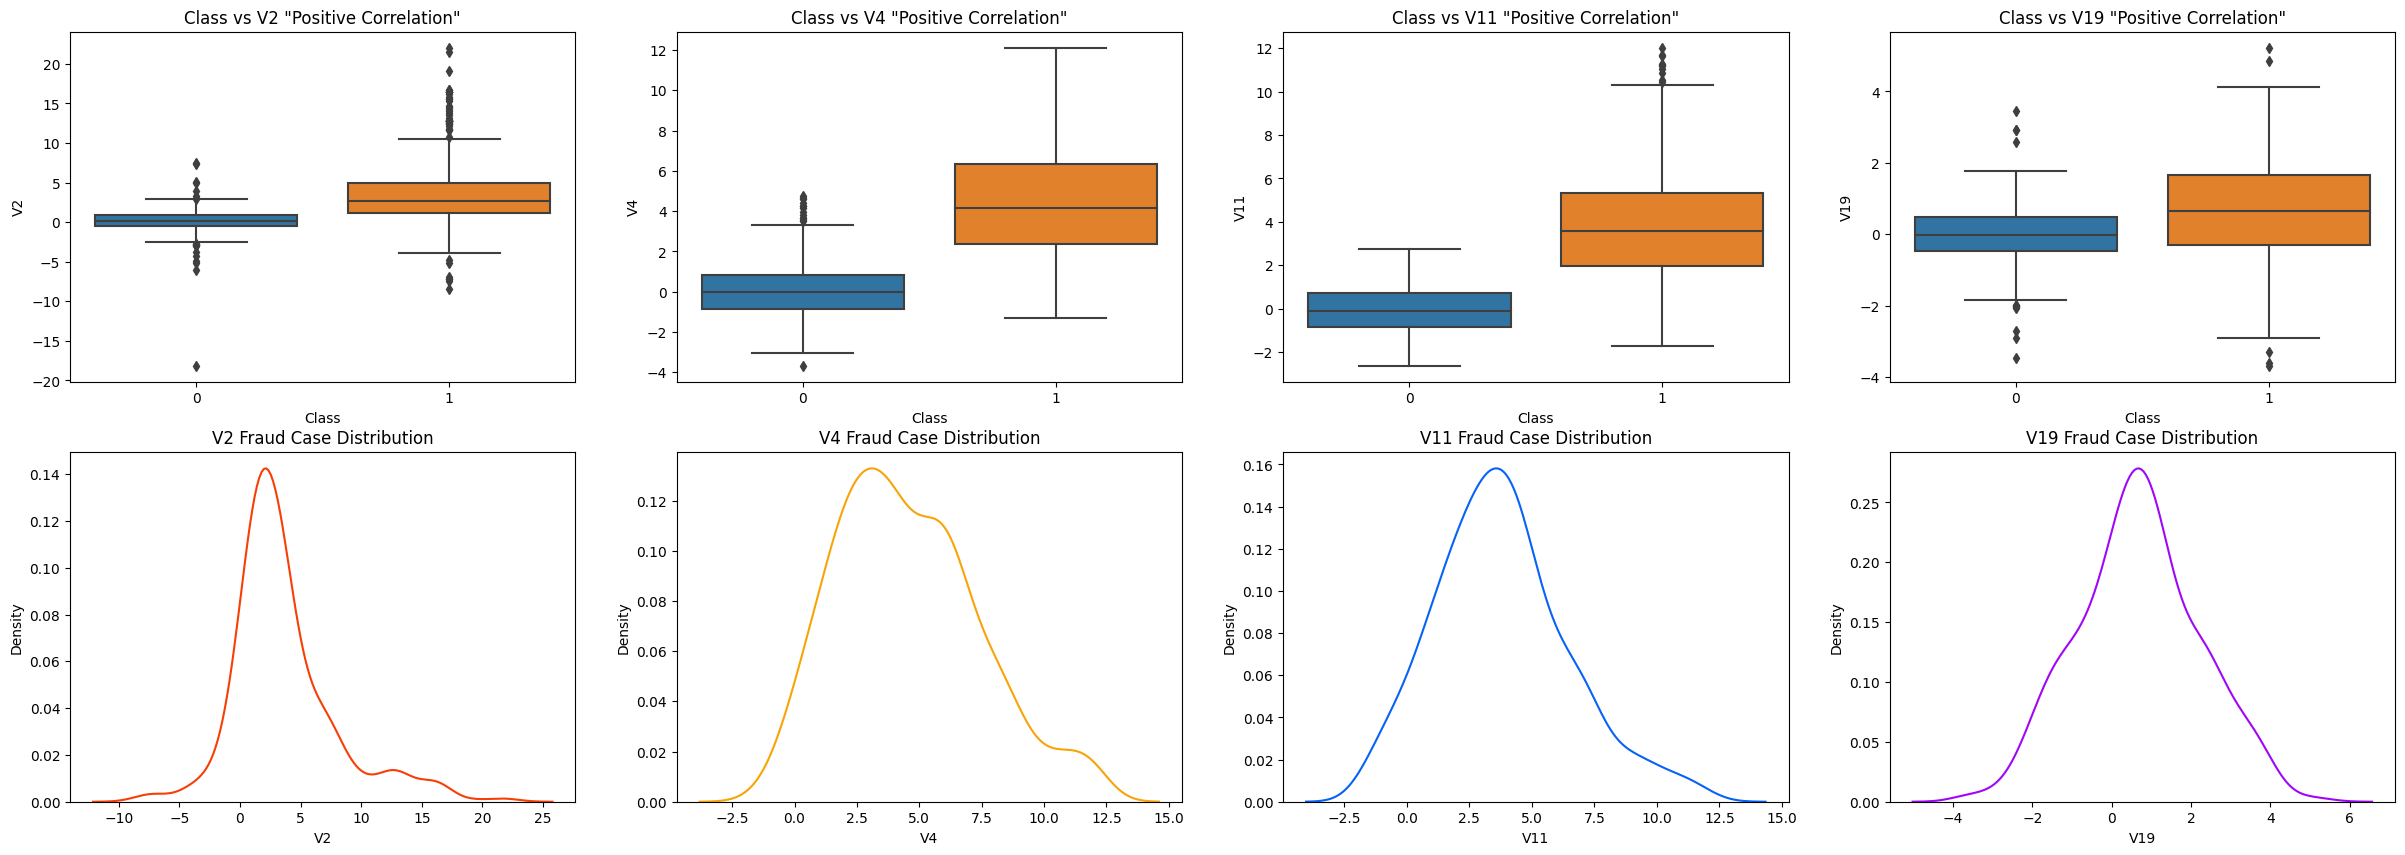

In [24]:
fig,ax=plt.subplots(2,4,figsize=(30,10))

ax=ax.ravel()

sns.boxplot(x='Class',y='V2',data=new_df,ax=ax[0])
ax[0].set_title('Class vs V2 "Positive Correlation"')

sns.boxplot(x='Class',y='V4',data=new_df,ax=ax[1])
ax[1].set_title('Class vs V4 "Positive Correlation"')

sns.boxplot(x='Class',y='V11',data=new_df,ax=ax[2])
ax[2].set_title('Class vs V11 "Positive Correlation"')

sns.boxplot(x='Class',y='V19',data=new_df,ax=ax[3])
ax[3].set_title('Class vs V19 "Positive Correlation"')

sns.kdeplot(new_df['V2'].loc[new_df['Class']==1],color='#f83e07',ax=ax[4])
ax[4].set_title('V2 Fraud Case Distribution')

sns.kdeplot(new_df['V4'].loc[new_df['Class']==1],color='#f8a407',ax=ax[5])
ax[5].set_title('V4 Fraud Case Distribution')

sns.kdeplot(new_df['V11'].loc[new_df['Class']==1],color='#0762f8',ax=ax[6])
ax[6].set_title('V11 Fraud Case Distribution')

sns.kdeplot(new_df['V19'].loc[new_df['Class']==1],color='#a007f8',ax=ax[7])
ax[7].set_title('V19 Fraud Case Distribution')

plt.show()


only feature V19 has normal distribution of fraud cases as compare to rest of positively correlated features.

In [25]:
# Let's perform IQR method to catch outliers and drop them from dataframe and then split the data for train test split
print("....... For V10...... ")
v10_fraud=new_df['V10'].loc[new_df['Class']==1].values
Q1_v10,Q3_v10=np.percentile(v10_fraud,25),np.percentile(v10_fraud,75)
print(f'25 Percentile: {round(Q1_v10,4)}')
print(f'75 Percentile: {round(Q3_v10,4)}')

IQR_v10=Q3_v10-Q1_v10
print()
print("IQR",IQR_v10)
v10_cutoff=IQR_v10*1.5
print('Cutoff Value',IQR_v10*1.5)
lower_bound_v10,upper_bound_v10=Q1_v10-v10_cutoff,Q3_v10+v10_cutoff
print()
print('Lower Bound ',lower_bound_v10)
print('Upper Bound',upper_bound_v10)

outliers=[x for x in v10_fraud if x < lower_bound_v10 or x > upper_bound_v10]

print("Outliers of V10",outliers)
print('Number of outliers:',len(outliers))
new_df = new_df.drop(new_df[(new_df['V10'] > upper_bound_v10) | (new_df['V10'] < lower_bound_v10)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

print()
print("....... For V12...... ")
v12_fraud=new_df['V12'].loc[new_df['Class']==1].values
Q1_v12,Q3_v12=np.percentile(v12_fraud,25),np.percentile(v12_fraud,75)
print(f'25 Percentile: {round(Q1_v12,4)}')
print(f'75 Percentile: {round(Q3_v12,4)}')

IQR_v12=Q3_v12-Q1_v12
print()
print("IQR",IQR_v12)
v12_cutoff=IQR_v12*1.5
print('Cutoff Value',IQR_v12*1.5)
lower_bound_v12,upper_bound_v12=Q1_v12-v12_cutoff,Q3_v12+v12_cutoff
print()
print('Lower Bound ',lower_bound_v12)
print('Upper Bound',upper_bound_v12)

outliers=[x for x in v12_fraud if x < lower_bound_v12 or x > upper_bound_v12]

print("Outliers of V12",outliers)
print('Number of outliers:',len(outliers))
new_df = new_df.drop(new_df[(new_df['V12'] > upper_bound_v12) | (new_df['V12'] < lower_bound_v12)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

print()
print("....... For V14...... ")
v14_fraud=new_df['V14'].loc[new_df['Class']==1].values
Q1_v14,Q3_v14=np.percentile(v14_fraud,25),np.percentile(v14_fraud,75)
print(f'25 Percentile: {round(Q1_v14,4)}')
print(f'75 Percentile: {round(Q3_v14,4)}')

IQR_v14=Q3_v14-Q1_v14
print()
print("IQR",IQR_v14)
v14_cutoff=IQR_v14*1.5
print('Cutoff Value',IQR_v14*1.5)
lower_bound_v14,upper_bound_v14=Q1_v14-v14_cutoff,Q3_v14+v14_cutoff
print()
print('Lower Bound ',lower_bound_v14)
print('Upper Bound',upper_bound_v14)

outliers=[x for x in v14_fraud if x < lower_bound_v14 or x > upper_bound_v14]

print("Outliers of V12",outliers)
print('Number of outliers:',len(outliers))
new_df = new_df.drop(new_df[(new_df['V14'] > upper_bound_v14) | (new_df['V14'] < lower_bound_v14)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))


....... For V10...... 
25 Percentile: -7.7567
75 Percentile: -2.6142

IQR 5.142514314657911
Cutoff Value 7.713771471986866

Lower Bound  -15.47046969983434
Upper Bound 5.099587558797303
Outliers of V10 [-16.3035376590131, -23.2282548357516, -20.9491915543611, -24.4031849699728, -18.9132433348732, -22.1870885620007, -17.1415136412892, -16.6011969664137, -22.1870885620007, -15.5637913387301, -15.5637913387301, -24.5882624372475, -18.2711681738888, -16.2556117491401, -22.1870885620007, -16.7460441053944, -16.6496281595399, -19.836148851696, -22.1870885620007]
Number of outliers: 19
Number of Instances after outliers removal: 963

....... For V12...... 
25 Percentile: -8.464
75 Percentile: -2.8249

IQR 5.63902050475877
Cutoff Value 8.458530757138156

Lower Bound  -16.922496886663865
Upper Bound 5.633585132371216
Outliers of V12 [-17.003289445516, -18.4311310279993, -17.7691434633638, -18.6837146333443, -17.1829184301947, -17.2286622386187, -17.1829184301947, -17.1504052507291, -17.00328944

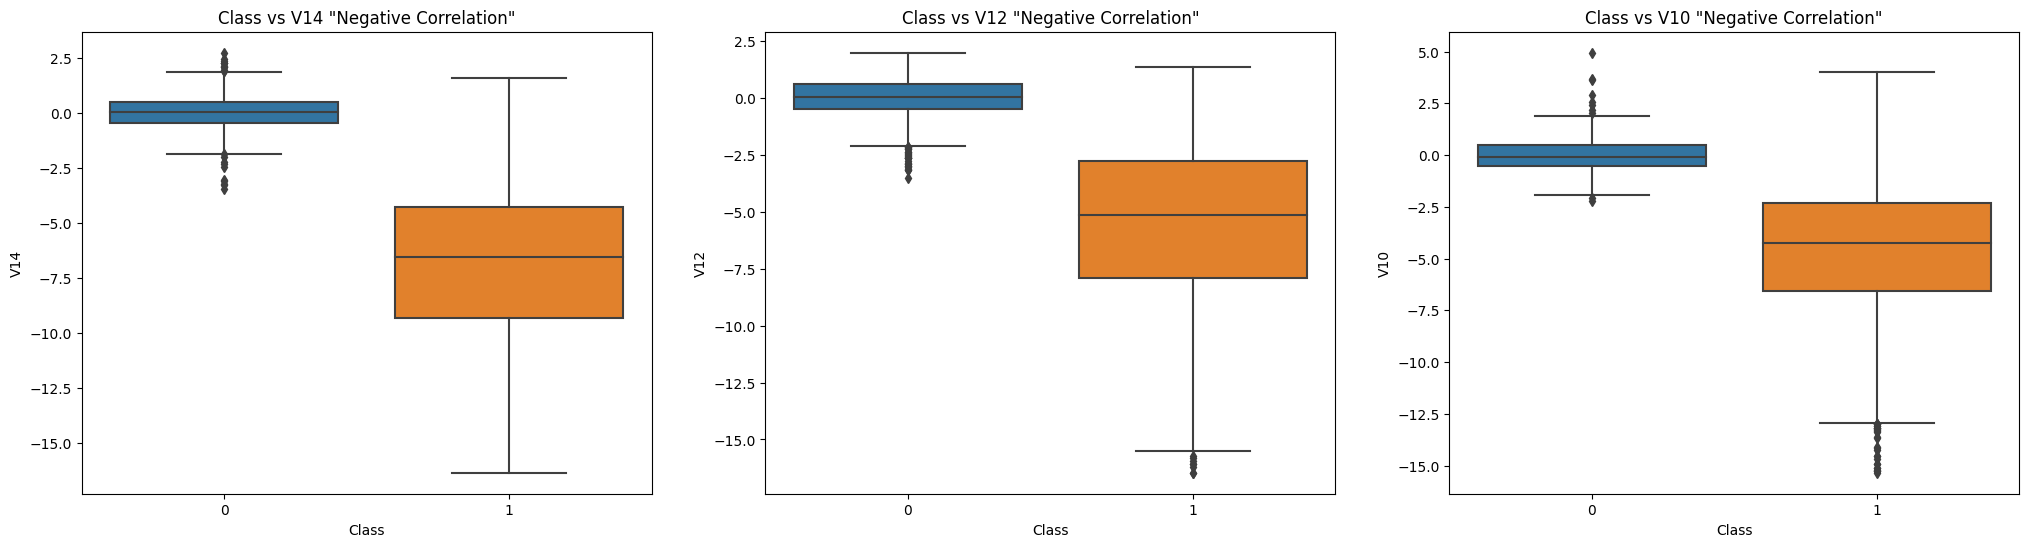

In [26]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
sns.boxplot(x='Class',y='V14',data=new_df,ax=ax[0])
ax[0].set_title('Class vs V14 "Negative Correlation"')

sns.boxplot(x='Class',y='V12',data=new_df,ax=ax[1])
ax[1].set_title('Class vs V12 "Negative Correlation"')

sns.boxplot(x='Class',y='V10',data=new_df,ax=ax[2])
ax[2].set_title('Class vs V10 "Negative Correlation"')
plt.show()

Remaining outliers are extreme outliers if we try to remove them also we will loose identification of feature


In [27]:
X_undersample=new_df.drop(columns='Class')
y_undersample=new_df['Class']

In [28]:
from sklearn.model_selection import train_test_split
x_train_us,x_test_us,y_train_us,y_test_us=train_test_split(X_undersample,y_undersample,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [30]:
print('--------------------Logistic Regression-------------------')
lr=LogisticRegression()
lr.fit(x_train_us,y_train_us)
y_pred_lr=lr.predict(x_test_us)
print("ROC AUC Score",roc_auc_score(y_pred_lr,y_test_us))
print(classification_report(y_test_us,y_pred_lr))
print()

print('---------------------------SVM------------------------------')
svc=SVC()
svc.fit(x_train_us,y_train_us)
y_pred_svc=svc.predict(x_test_us)
print("ROC AUC Score",roc_auc_score(y_pred_svc,y_test_us))
print(classification_report(y_test_us,y_pred_svc))

print()
print('--------------------------Knn------------------------------')
knn=KNeighborsClassifier()
knn.fit(x_train_us,y_train_us)
y_pred_knn=knn.predict(x_test_us)
print("ROC AUC Score",roc_auc_score(y_pred_knn,y_test_us))
print(classification_report(y_test_us,y_pred_knn))


print()
print('----------------------GaussianNB----------------------')
gnb=GaussianNB()
gnb.fit(x_train_us,y_train_us)
y_pred_gnb=gnb.predict(x_test_us)
print("ROC AUC Score",roc_auc_score(y_pred_gnb,y_test_us))
print(classification_report(y_test_us,y_pred_gnb))


print()
print('------------------RandomForestClassifier----------------')
rfc=RandomForestClassifier()
rfc.fit(x_train_us,y_train_us)
y_pred_rfc=rfc.predict(x_test_us)
print("ROC AUC Score",roc_auc_score(y_pred_rfc,y_test_us))
print(classification_report(y_test_us,y_pred_rfc))



--------------------Logistic Regression-------------------
ROC AUC Score 0.9595238095238096
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       101
           1       0.98      0.93      0.95        88

    accuracy                           0.96       189
   macro avg       0.96      0.96      0.96       189
weighted avg       0.96      0.96      0.96       189


---------------------------SVM------------------------------
ROC AUC Score 0.950421700478687
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       101
           1       0.98      0.91      0.94        88

    accuracy                           0.95       189
   macro avg       0.95      0.94      0.95       189
weighted avg       0.95      0.95      0.95       189


--------------------------Knn------------------------------
ROC AUC Score 0.9459876543209875
              precision    recall  f1-score   support

           

If you use cross validation score in above code then you can get better ROC AUC score than above ROC AUC score because you do train and test more times and  it make instances more visible to model.

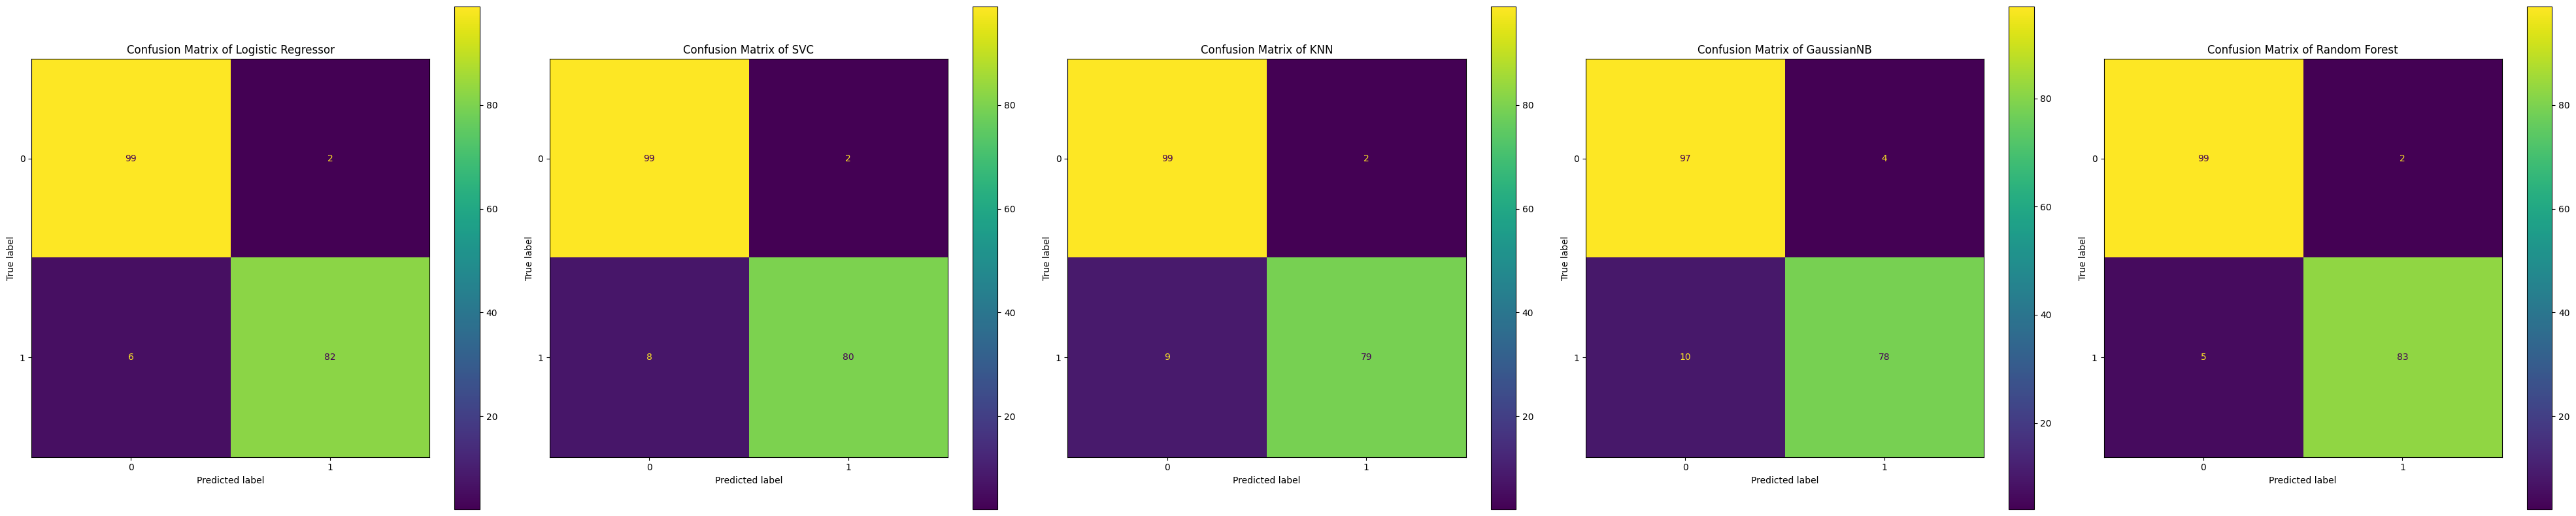

In [31]:
fig, ax = plt.subplots(1, 5, figsize=(40, 8))

# Logistic Regressor
ConfusionMatrixDisplay.from_predictions(y_test_us, y_pred_lr, ax=ax[0])
ax[0].set_title('Confusion Matrix of Logistic Regressor')

# Support Vector Classifier
ConfusionMatrixDisplay.from_predictions(y_test_us, y_pred_svc, ax=ax[1])
ax[1].set_title('Confusion Matrix of SVC')

# K-Nearest Neighbors
ConfusionMatrixDisplay.from_predictions(y_test_us, y_pred_knn, ax=ax[2])
ax[2].set_title('Confusion Matrix of KNN')

# Gaussian Naive Bayes
ConfusionMatrixDisplay.from_predictions(y_test_us, y_pred_gnb, ax=ax[3])
ax[3].set_title('Confusion Matrix of GaussianNB')

# Random Forest Classifier
ConfusionMatrixDisplay.from_predictions(y_test_us, y_pred_rfc, ax=ax[4])

ax[4].set_title('Confusion Matrix of Random Forest')

plt.tight_layout() 
plt.show()


In [32]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression 
log_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_params,cv=5)
grid_log_reg.fit(x_train_us, y_train_us)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
log_reg



LogisticRegression(C=0.1)

In [33]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": [4,6,2,None]}
grid_tree = GridSearchCV(RandomForestClassifier(), tree_params,n_jobs=-1,cv=5)
grid_tree.fit(x_train_us, y_train_us)
grid_rfc = grid_tree.best_estimator_
print(grid_rfc)

RandomForestClassifier(criterion='entropy')


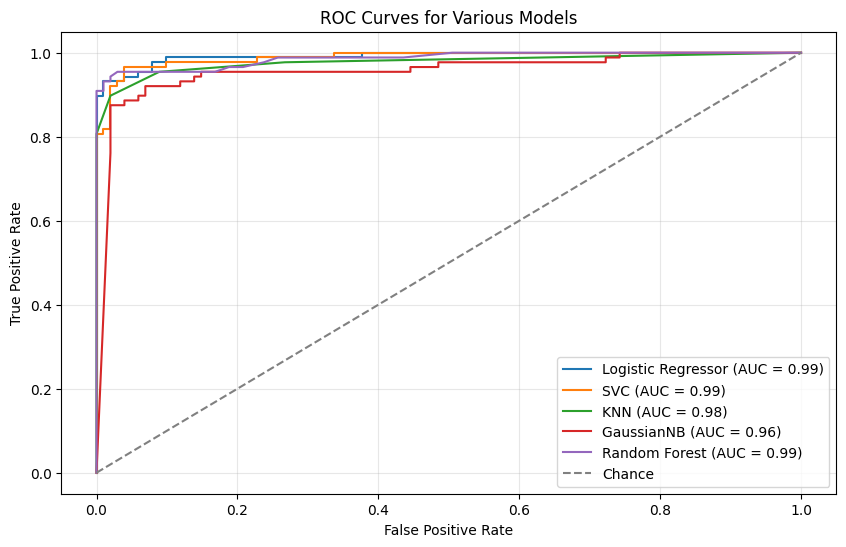

In [34]:

plt.figure(figsize=(10,6))
from sklearn.metrics import roc_curve, auc
y_score_lr = log_reg.predict_proba(x_test_us)  # Logistic Regression with hypertunning
y_score_svc = svc.decision_function(x_test_us)  # Support Vector Classifier
y_score_knn = knn.predict_proba(x_test_us)  # K-Nearest Neighbors
y_score_gnb = gnb.predict_proba(x_test_us)  # Gaussian Naive Bayes
y_score_rfc = grid_rfc.predict_proba(x_test_us)  # Random Forest with hypertunning

# Logistic Regressor
fpr_lr, tpr_lr, _ = roc_curve(y_test_us, y_score_lr[:, 1]) 
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regressor (AUC = {roc_auc_lr:.2f})')

# Support Vector Classifier
fpr_svc, tpr_svc, _ = roc_curve(y_test_us, y_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_svc:.2f})')

# K-Nearest Neighbors
fpr_knn, tpr_knn, _ = roc_curve(y_test_us, y_score_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')

# Gaussian Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(y_test_us, y_score_gnb[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
plt.plot(fpr_gnb, tpr_gnb, label=f'GaussianNB (AUC = {roc_auc_gnb:.2f})')

# Random Forest Classifier
fpr_rfc, tpr_rfc, _ = roc_curve(y_test_us, y_score_rfc[:, 1])
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {roc_auc_rfc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


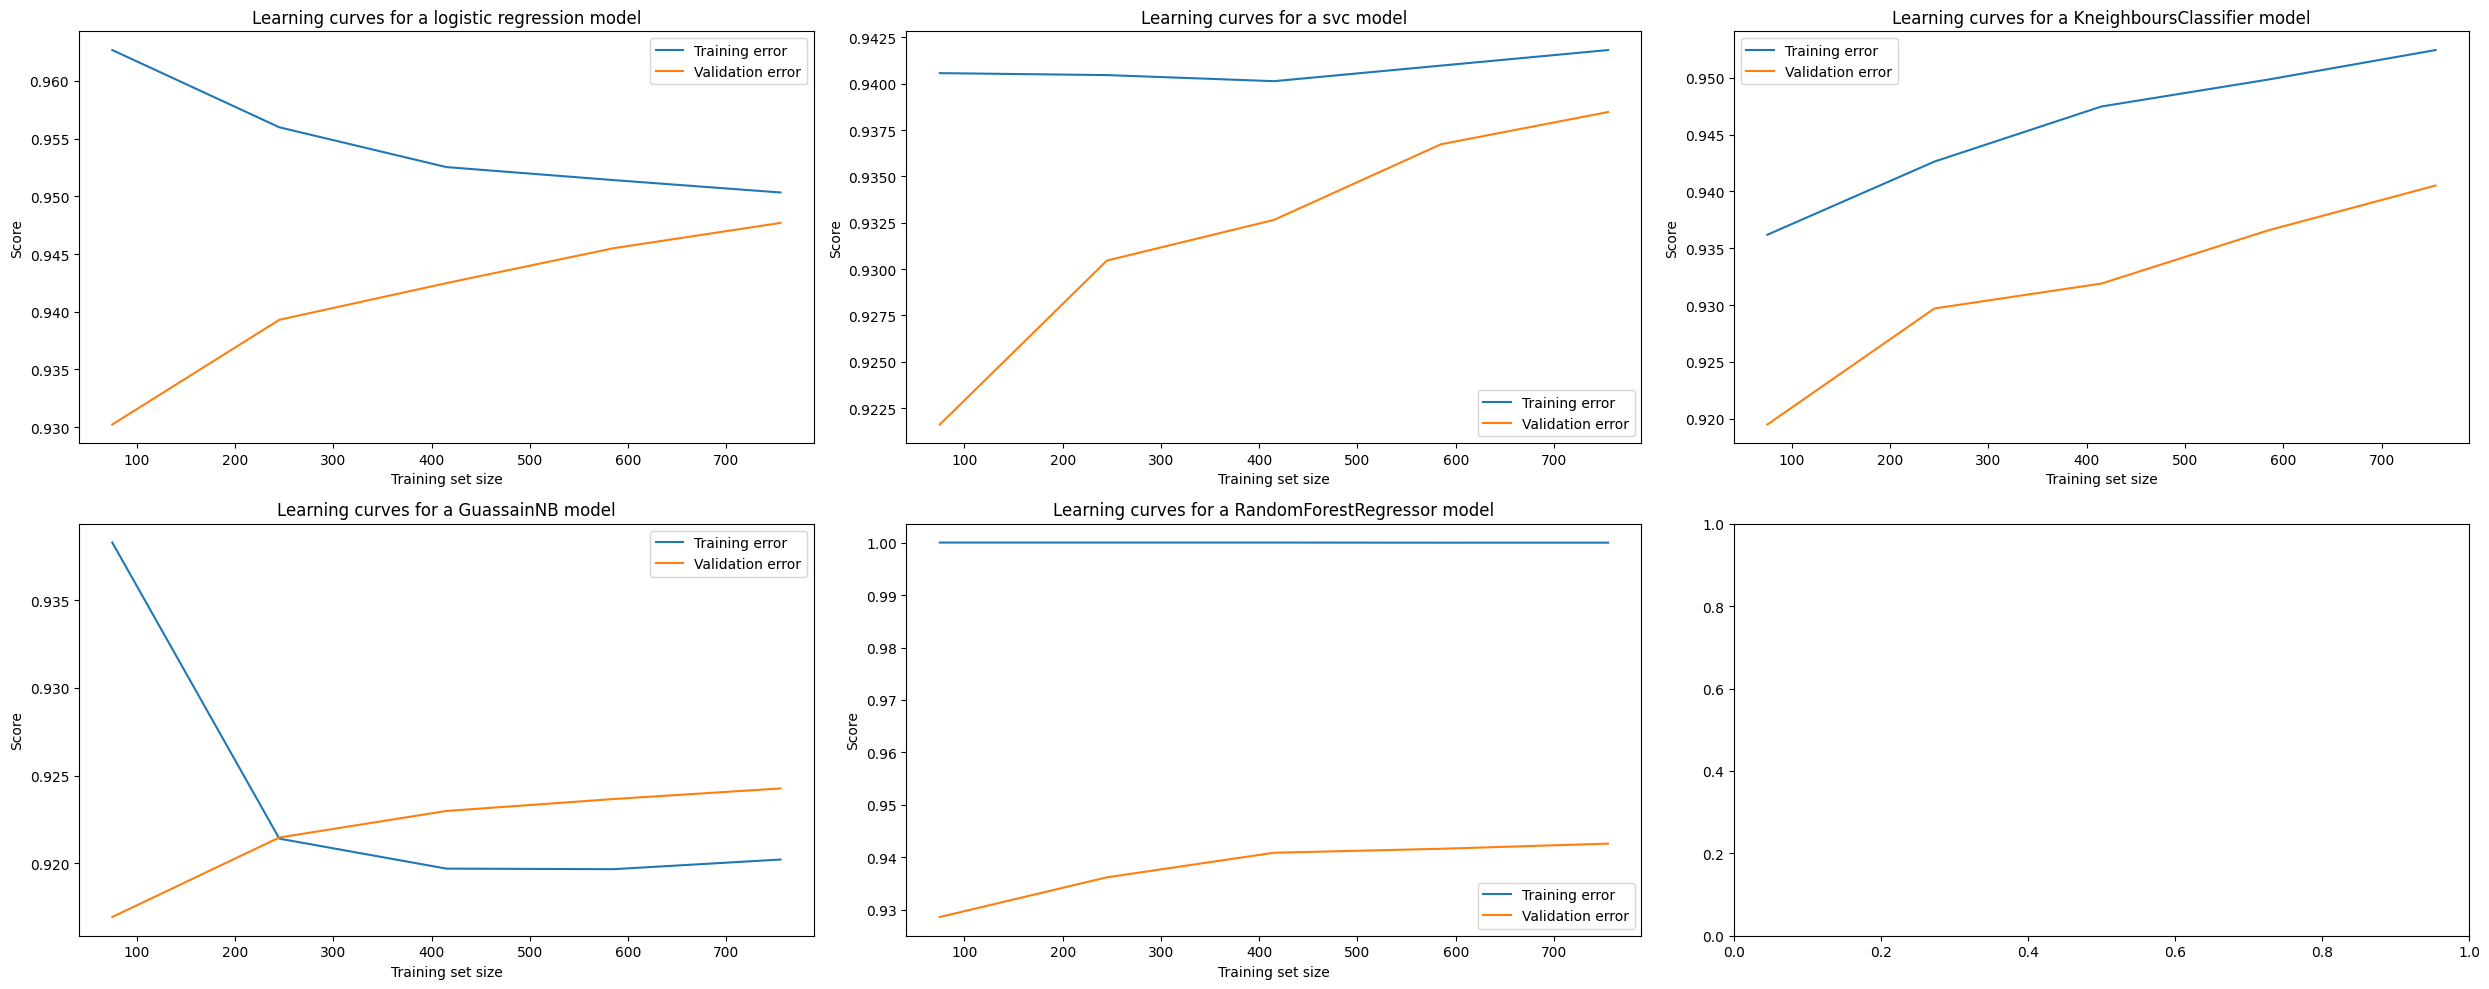

In [35]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=70,test_size=0.2,random_state=42)
fig,ax=plt.subplots(2,3,figsize=(25,10))
ax=ax.ravel()

# for logistic regression
train_sizes1, train_scores1, validation_scores1=learning_curve(log_reg,X_undersample,y_undersample,cv=cv)
train_score_mean1=train_scores1.mean(axis=1)
validation_score_mean1=validation_scores1.mean(axis=1)

ax[0].plot(train_sizes1, train_score_mean1, label = 'Training error')
ax[0].plot(train_sizes1, validation_score_mean1, label = 'Validation error')
ax[0].set_xlabel('Training set size')
ax[0].set_ylabel('Score')
ax[0].set_title('Learning curves for a logistic regression model')
ax[0].legend()
plt.tight_layout()

# for svc
train_sizes2, train_scores2, validation_scores2=learning_curve(svc,X_undersample,y_undersample,cv=cv)
train_score_mean2=train_scores2.mean(axis=1)
validation_score_mean2=validation_scores2.mean(axis=1)

ax[1].plot(train_sizes2, train_score_mean2, label = 'Training error')
ax[1].plot(train_sizes2, validation_score_mean2, label = 'Validation error')
ax[1].set_xlabel('Training set size')
ax[1].set_ylabel('Score')
ax[1].set_title('Learning curves for a svc model')
ax[1].legend()
plt.tight_layout()

#for KneighbourClassifier
train_sizes3, train_scores3, validation_scores3=learning_curve(knn,X_undersample,y_undersample,cv=cv)
train_score_mean3=train_scores3.mean(axis=1)
validation_score_mean3=validation_scores3.mean(axis=1)
ax[2].plot(train_sizes3, train_score_mean3, label = 'Training error')
ax[2].plot(train_sizes3, validation_score_mean3, label = 'Validation error')
ax[2].set_xlabel('Training set size')
ax[2].set_ylabel('Score')
ax[2].set_title('Learning curves for a KneighboursClassifier model')
ax[2].legend()
plt.tight_layout()

#For GuassainNB
train_sizes4, train_scores4, validation_scores4=learning_curve(gnb,X_undersample,y_undersample,cv=cv)
train_score_mean4=train_scores4.mean(axis=1)
validation_score_mean4=validation_scores4.mean(axis=1)
ax[3].plot(train_sizes4, train_score_mean4, label = 'Training error')
ax[3].plot(train_sizes4, validation_score_mean4, label = 'Validation error')
ax[3].set_xlabel('Training set size')
ax[3].set_ylabel('Score')
ax[3].set_title('Learning curves for a GuassainNB model')
ax[3].legend()
plt.tight_layout()

#For RandomForestRegressor
train_sizes5, train_scores5, validation_scores5=learning_curve(grid_rfc,X_undersample,y_undersample,cv=cv)
train_score_mean5=train_scores5.mean(axis=1)
validation_score_mean5=validation_scores5.mean(axis=1)
ax[4].plot(train_sizes5, train_score_mean5, label = 'Training error')
ax[4].plot(train_sizes5, validation_score_mean5, label = 'Validation error')
ax[4].set_xlabel('Training set size')
ax[4].set_ylabel('Score')
ax[4].set_title('Learning curves for a RandomForestRegressor model')
ax[4].legend()
plt.tight_layout()

plt.show()


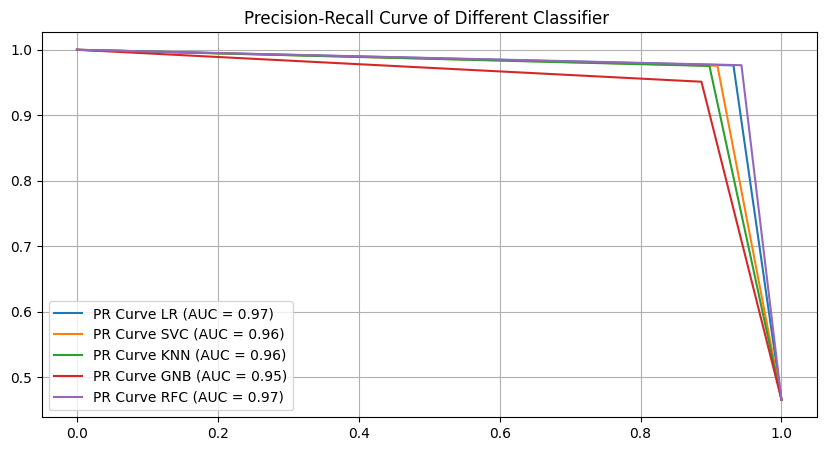

In [36]:


from sklearn.metrics import precision_recall_curve, auc
plt.figure(figsize=(10,5))
# Logistic Regressor
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test_us, y_pred_lr) 
pr_auc_lr = auc(recall_lr, precision_lr)
plt.plot(recall_lr, precision_lr, label=f'PR Curve LR (AUC = {pr_auc_lr:.2f})')

# Support Vector Classifier
precision_svc, recall_svc, thresholds_svc = precision_recall_curve(y_test_us, y_pred_svc) 
pr_auc_svc = auc(recall_svc, precision_svc)
plt.plot(recall_svc, precision_svc, label=f'PR Curve SVC (AUC = {pr_auc_svc:.2f})')

# K-Nearest Neighbors
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test_us, y_pred_knn) 
pr_auc_knn = auc(recall_knn, precision_knn)
plt.plot(recall_knn, precision_knn, label=f'PR Curve KNN (AUC = {pr_auc_knn:.2f})')

# Gaussian Naive Bayes
precision_gnb, recall_gnb, thresholds_gnb = precision_recall_curve(y_test_us, y_pred_gnb) 
pr_auc_gnb = auc(recall_gnb, precision_gnb)
plt.plot(recall_gnb, precision_gnb, label=f'PR Curve GNB (AUC = {pr_auc_gnb:.2f})')

# Random Forest Classifier
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test_us, y_pred_rfc) 
pr_auc_rfc = auc(recall_rfc, precision_rfc)
plt.plot(recall_rfc, precision_rfc, label=f'PR Curve RFC (AUC = {pr_auc_rfc:.2f})')

plt.title('Precision-Recall Curve of Different Classifier ')
plt.legend()
plt.grid()
plt.show()


Your PR curve score can vary when you run this code because i do sample operation on dataset which make it random and all results are which are related to this dataframe also can vary due to same reason.

In [37]:

log_reg.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [38]:

grid_rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [39]:

y_pred_original_lr=log_reg.predict(x_test)
y_pred_original_rfc=grid_rfc.predict(x_test)

In [40]:
#svc.fit(x_train,y_train)

In [41]:
#y_pred_original_svc=svc.predict(x_test)

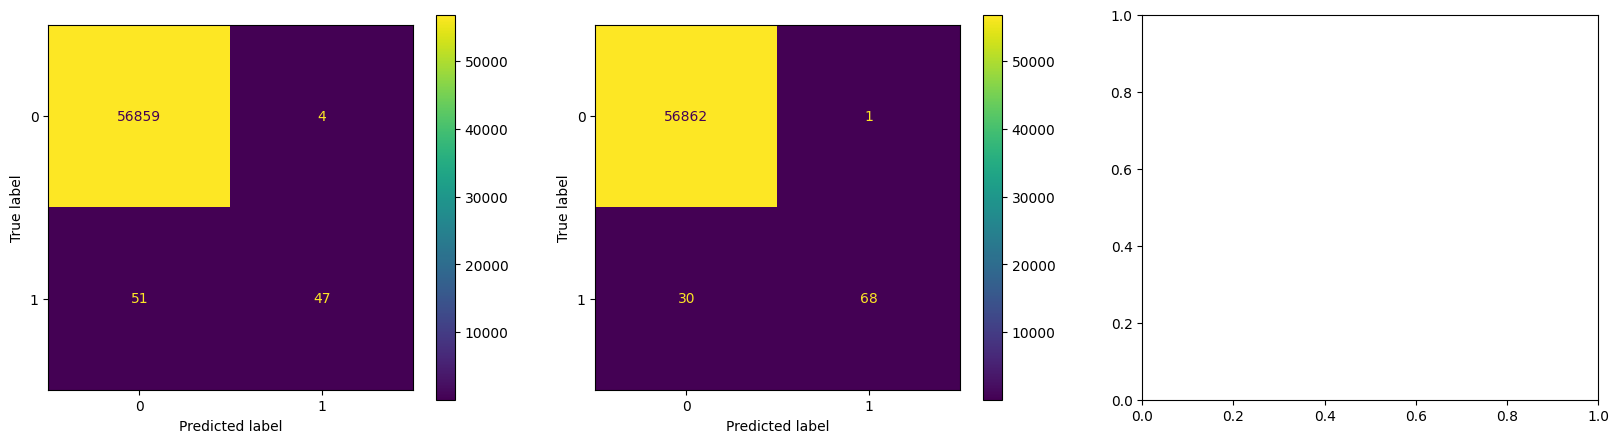

In [42]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_original_lr,ax=ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_original_rfc,ax=ax[1])
#ConfusionMatrixDisplay.from_predictions(y_test, y_pred_original_svc,ax=ax[2])
plt.show()


This time RANDOMFORESTCLASSIFER work better than LOGISTICREGRESSOR 

OVERSAMPLING USING SMOTE

In [43]:
# Install the imblearn_
!pip install imbalanced-learn scikit-learn

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
print(f'Original Train Size:{len(x_train)} ')
print(f'Original Test Size:{len(x_test)} ')


Original Train Size:227846 
Original Test Size:56961 


SMOTE generates synthetic samples only for the minority class to balance it. These synthetic samples are artificially created based on the training data.
If SMOTE is applied before splitting, the synthetic samples might "leak" into the test set. The model could then learn these synthetic patterns and perform unrealistically well during testing.

In [46]:
sm=SMOTE(random_state=42)

In [47]:
x_train_resampled,y_train_resampled=sm.fit_resample(x_train,y_train)

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg_sm = RandomizedSearchCV(LogisticRegression(), log_reg_params)
rand_log_reg_sm.fit(x_train_resampled,y_train_resampled)
log_reg_sm = rand_log_reg_sm.best_estimator_
log_reg_sm

LogisticRegression(C=0.1)

In [50]:
logi_sm=LogisticRegression(C=0.001)  #please check C value from above code then replace the value in this code 
logi_sm.fit(x_train_resampled,y_train_resampled)

LogisticRegression(C=0.001)

In [51]:
y_pred_sm_us=logi_sm.predict_proba(x_test_us)

In [52]:
y_pred_sm_us1=logi_sm.predict(x_test_us)

In [53]:
print("ROC AUC Score",roc_auc_score(y_pred_sm_us1,y_test_us))
print('Recall',recall_score(y_pred_sm_us1,y_test_us))
print('precision',precision_score(y_pred_sm_us1,y_test_us))

print(classification_report(y_test_us,y_pred_sm_us1))
print()

ROC AUC Score 0.9719626168224299
Recall 1.0
precision 0.9318181818181818
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       101
           1       1.00      0.93      0.96        88

    accuracy                           0.97       189
   macro avg       0.97      0.97      0.97       189
weighted avg       0.97      0.97      0.97       189




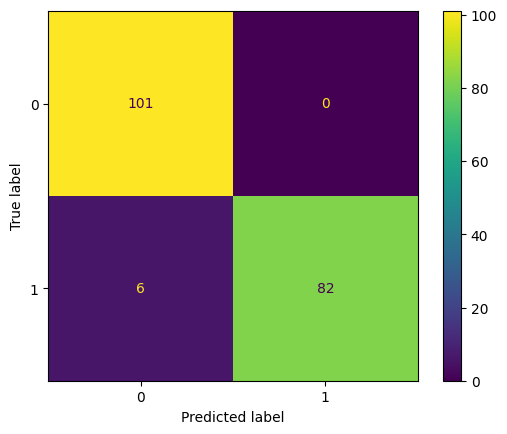

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test_us, y_pred_sm_us1)

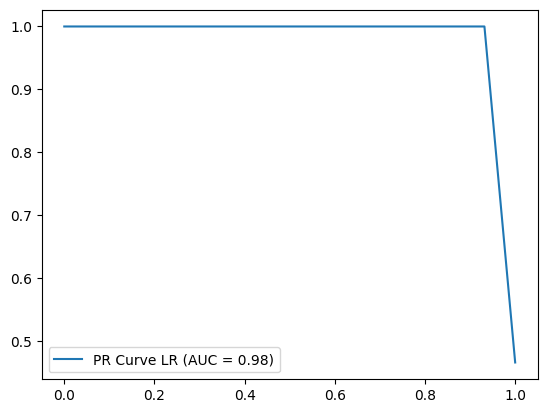

In [55]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test_us, y_pred_sm_us1) 
pr_auc_sm_us = auc(recall_lr, precision_lr)
plt.plot(recall_lr, precision_lr, label=f'PR Curve LR (AUC = {pr_auc_sm_us:.2f})')
plt.legend(loc='best')
plt.show()


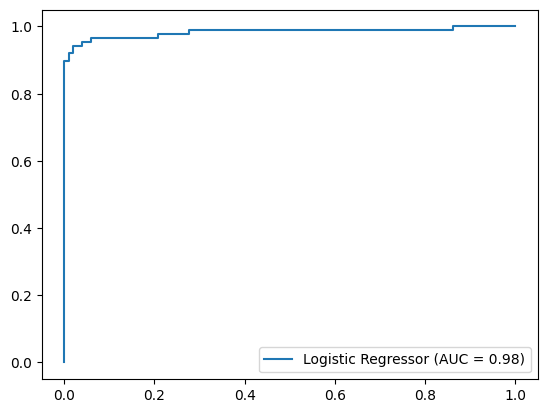

In [56]:
y_score_sm_us = log_reg.predict_proba(x_test_us)
fpr_lr, tpr_lr, _ = roc_curve(y_test_us, y_score_sm_us[:, 1]) 
roc_auc_sm_us = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regressor (AUC = {roc_auc_sm_us:.2f})')
plt.legend(loc='best')
plt.show()

In [57]:
pred=logi_sm.predict(x_test)

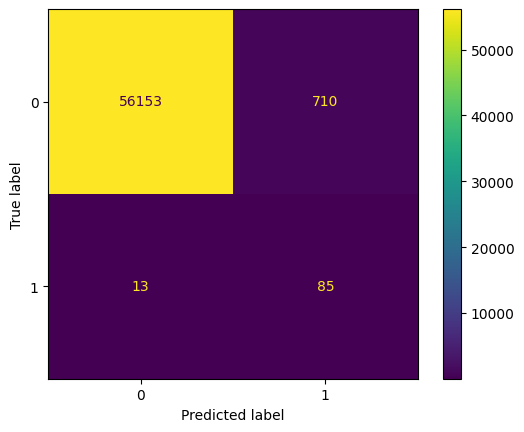

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)
plt.show()

In [59]:
rfc_sm=RandomForestClassifier(criterion='entropy')

In [60]:
rfc_sm.fit(x_train_resampled,y_train_resampled)


RandomForestClassifier(criterion='entropy')

In [61]:
rfc_pred_sm=rfc_sm.predict(x_test)

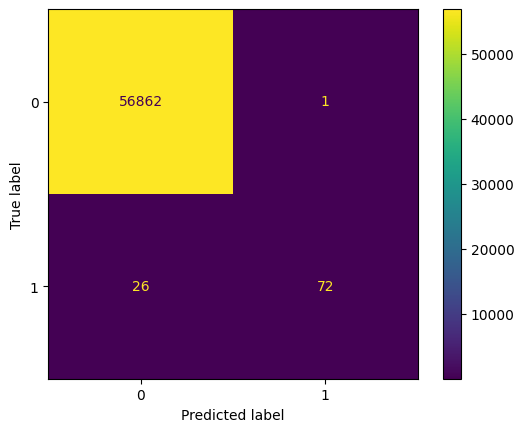

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test,rfc_pred_sm)
plt.show()

Final Decision:

In our analysis, we employed both undersampling and oversampling techniques to address class imbalance. When using undersampling, we observed a higher number of false negatives (FN), where actual fraud cases were misclassified as non-fraudulent. This is a significant concern as it compromises fraud detection, affecting both the company and its users. On the other hand, oversampling showed an improvement in reducing false negatives but introduced more false positives (FP), where non-fraudulent cases were incorrectly flagged as fraudulent. False positives, though less critical than false negatives, can harm the company’s reputation by inconveniencing users, potentially leading to user dissatisfaction and service abandonment.

When we applied Logistic Regression as our model, undersampling resulted in fewer false positives (only 3 cases), but the false negatives were significantly higher. This is problematic for fraud detection as undetected fraudulent activities directly impact business operations and user trust. Conversely, oversampling with Logistic Regression performed worse in terms of false positives, which, though reduced fraud risk, increased customer dissatisfaction due to unwarranted interventions.

Using Random Forest Classifier, however, yielded much better results. It outperformed Logistic Regression in both undersampling and oversampling scenarios. Particularly with oversampling, the Random Forest Classifier achieved the best performance, demonstrating the lowest number of false negatives and just one false positive. This balance ensures robust fraud detection while maintaining customer trust and minimizing inconvenience.

Based on these findings, we conclude that the Random Forest Classifier with oversampling is the most suitable approach for our fraud detection system. Moving forward, further refinement and optimization of this model could help achieve even greater accuracy and reliability.
